Epoch 1/30
237/237 [==============================] - 61s 257ms/step - loss: 0.6940 - accuracy: 0.4934 - val_loss: 0.6936 - val_accuracy: 0.4810
Epoch 2/30
237/237 [==============================] - 61s 258ms/step - loss: 0.6937 - accuracy: 0.4936 - val_loss: 0.6927 - val_accuracy: 0.5190
Epoch 3/30
237/237 [==============================] - 61s 256ms/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 4/30
237/237 [==============================] - 61s 258ms/step - loss: 0.6926 - accuracy: 0.5112 - val_loss: 0.6889 - val_accuracy: 0.4976
Epoch 5/30
237/237 [==============================] - 64s 268ms/step - loss: 0.6918 - accuracy: 0.5232 - val_loss: 0.6939 - val_accuracy: 0.5036
Epoch 6/30
237/237 [==============================] - 64s 269ms/step - loss: 0.6900 - accuracy: 0.5402 - val_loss: 0.6941 - val_accuracy: 0.5012
Epoch 7/30
237/237 [==============================] - 64s 270ms/step - loss: 0.6863 - accuracy: 0.5466 - val_loss: 0.6971 - val_ac

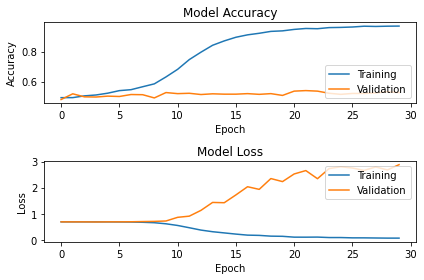

In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
X = np.array(X)
y = pickle.load(open("y.pickle", "rb"))
y = np.array(y)
# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
  json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

 
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()